In [ ]:
!pip install catboost
!pip install shap

In [ ]:
import warnings

import random

import numpy as np
import pandas as pd
import scipy.stats as sps

import catboost
import catboost.datasets
import shap
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", mpl.MatplotlibDeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ content/housing_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ content/housing_price/test.csv')

In [ ]:
train = train.drop(columns = ['LandSlope', 'Street', 'RoofMatl', 'Exterior2nd', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'Electrical', 'LowQualFinSF', 
                                  'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'PavedDrive', 'EnclosedPorch',
                                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath'])
test = test.drop(columns = ['LandSlope', 'Street', 'RoofMatl', 'Exterior2nd', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'Electrical', 'LowQualFinSF', 
                                  'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'PavedDrive', 'EnclosedPorch',
                                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath'])

In [ ]:
test_id = test['Id']

In [ ]:
train = train.drop(columns='Id')
test = test.drop(columns='Id')

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

In [ ]:
y = train['SalePrice']
x = train.drop(columns='SalePrice')

In [ ]:
x['LotFrontage'] = x['LotFrontage'].fillna(x['LotFrontage'].mode()[0])
x['MasVnrArea'] = x['MasVnrArea'].fillna(x['MasVnrArea'].mean())

In [ ]:
random.seed(2021)
train_X, val_X, train_y, val_y = sklearn.model_selection.train_test_split(
    x,
    y,
    test_size=0.2,
)

In [ ]:
model = sklearn.ensemble.RandomForestRegressor().fit(train_X, train_y)

In [ ]:
model.score(val_X, val_y)

0.8840174271071851

In [ ]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

In [ ]:
pred = model.predict(test)

In [ ]:
result = pd.DataFrame()
result['Id'] = test_id
result['SalePrice'] = pred

In [ ]:
result.to_csv('submit.csv', encoding='utf-8', index=False)

0.14679

Случайный лес дал намного более хорошие результаты даже без особой обработки данных. Попробуем поизменять параметры, а также немного изменить данные.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ content/housing_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ content/housing_price/test.csv')

In [ ]:
train = train.drop(columns = ['LandSlope', 'Street', 'RoofMatl', 'Exterior2nd', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'Electrical', 'LowQualFinSF', 
                                  'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'PavedDrive', 'EnclosedPorch',
                                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath'])
test = test.drop(columns = ['LandSlope', 'Street', 'RoofMatl', 'Exterior2nd', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'Electrical', 'LowQualFinSF', 
                                  'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'PavedDrive', 'EnclosedPorch',
                                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath'])

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,856,854,1710,1,2,1,3,Gd,8,0,NaN,Attchd,RFn,2,548,TA,TA,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,TA,TA,298,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,TA,TA,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,TA,TA,0,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,TA,TA,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [ ]:
cat = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'YrSold']
train[cat] = train[cat].astype(str)
test[cat] = test[cat].astype(str)

In [ ]:
test_id = test['Id']

train = train.drop(columns='Id')
test = test.drop(columns='Id')

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

In [ ]:
y = train['SalePrice']
y, _ = sps.boxcox(y)

x = train.drop(columns='SalePrice')

In [ ]:
x['LotFrontage'] = x['LotFrontage'].fillna(x['LotFrontage'].mode()[0])
x['MasVnrArea'] = x['MasVnrArea'].fillna(x['MasVnrArea'].mean())

In [ ]:
model_1 = sklearn.ensemble.RandomForestRegressor().fit(x, y)

In [ ]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

In [ ]:
pred_1 = model_1.predict(test)

In [ ]:
result_1 = pd.DataFrame()
result_1['Id'] = test_id
result_1['SalePrice'] = pred_1

In [ ]:
result_1.to_csv('submit_1.csv', encoding='utf-8', index=False)

9.84639

Такое преобразование данных сильно ухудшило решение, следовательно, можно сделать вывод, что в изначальном варианте с CatBoost было всё плохо именно по этой причине - неверная обработка данных.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ content/housing_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ content/housing_price/test.csv')

In [ ]:
test_id = test['Id']

In [ ]:
train = train[['MSSubClass', 'MSZoning', 'OverallQual', 'GrLivArea',  'TotalBsmtSF', 'Fireplaces', 'GarageArea', 'Neighborhood', 'LotArea', 'SalePrice']]
test = test[['MSSubClass', 'MSZoning', 'OverallQual', 'GrLivArea',  'TotalBsmtSF', 'Fireplaces', 'GarageArea', 'Neighborhood', 'LotArea']]

In [ ]:
train.head()

,MSSubClass,MSZoning,OverallQual,GrLivArea,TotalBsmtSF,Fireplaces,GarageArea,Neighborhood,LotArea,SalePrice
0,60,RL,7,1710,856,0,548,CollgCr,8450,208500
1,20,RL,6,1262,1262,1,460,Veenker,9600,181500
2,60,RL,7,1786,920,1,608,CollgCr,11250,223500
3,70,RL,7,1717,756,1,642,Crawfor,9550,140000
4,60,RL,8,2198,1145,1,836,NoRidge,14260,250000


In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [ ]:
x = train.drop(columns='SalePrice')

y = train['SalePrice']
y, _ = sps.boxcox(y)

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

In [ ]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

In [ ]:
model_2 = sklearn.ensemble.RandomForestRegressor().fit(x, y)

In [ ]:
pred_2 = model_2.predict(test)

In [ ]:
result_2 = pd.DataFrame()
result_2['Id'] = test_id
result_2['SalePrice'] = pred_2

In [ ]:
result_2.to_csv('submit2.csv', encoding='utf-8', index=False)

При преобразовании Бокса-Кокса даже без каких-либо других действий с данными качество резко падает.

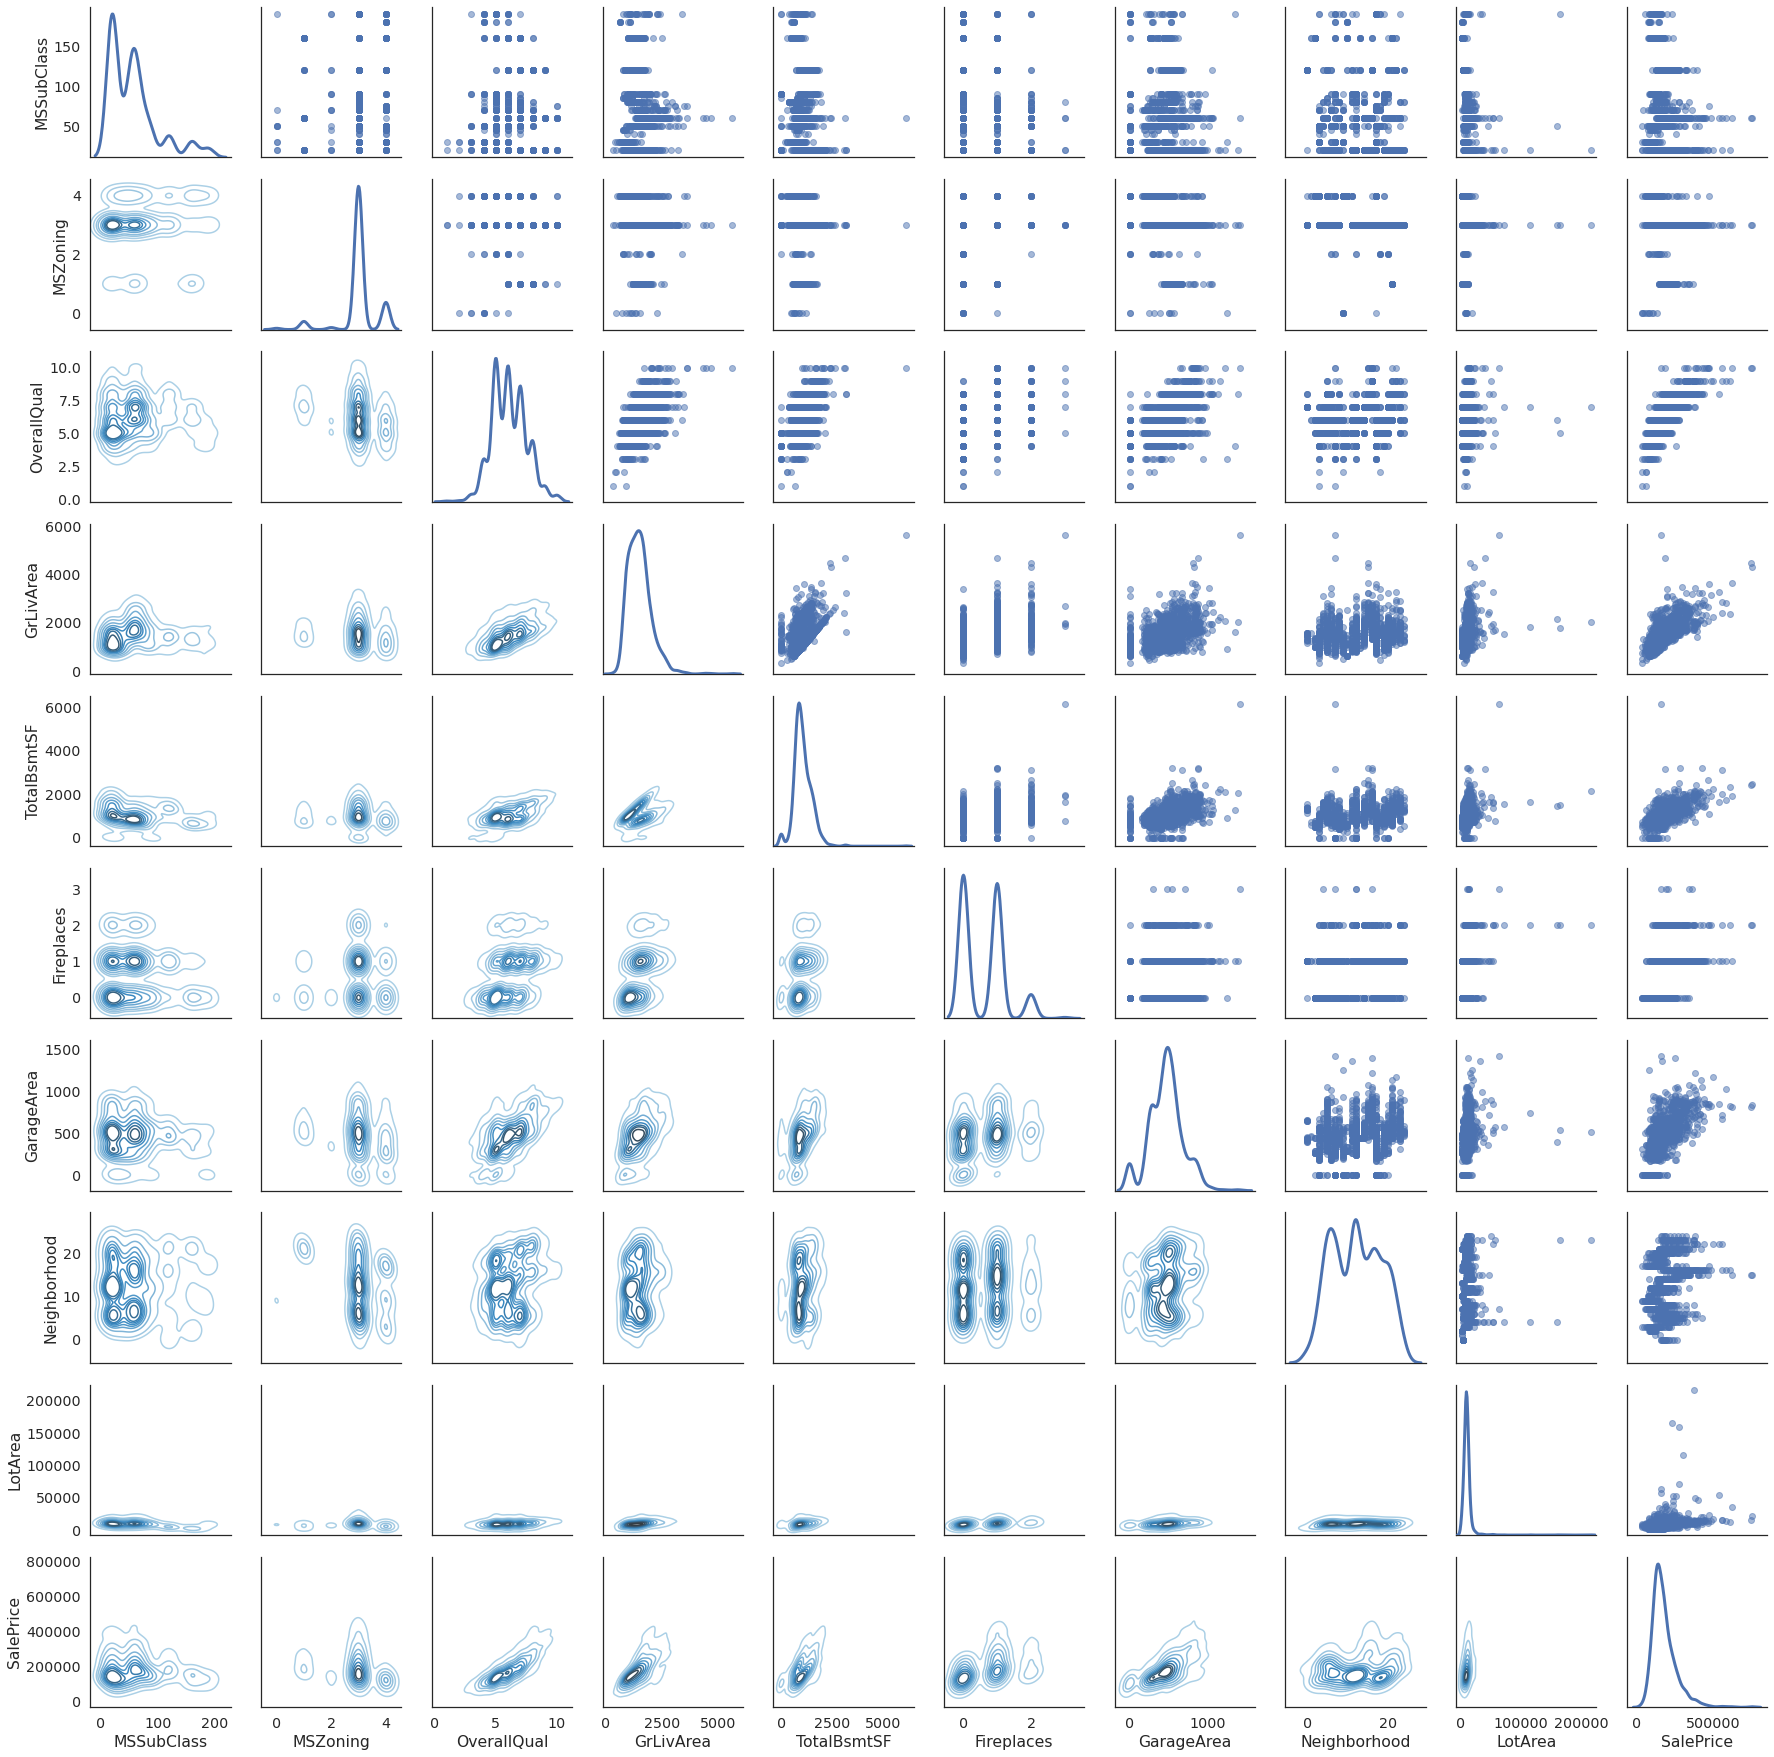

In [ ]:
sns.set(style='white', font_scale=1.3)

g = sns.PairGrid(train, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ content/housing_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ content/housing_price/test.csv')

In [ ]:
test_id = test['Id']

In [ ]:
train = train[['MSSubClass', 'MSZoning', 'OverallQual', 'GrLivArea',  'TotalBsmtSF', 'Fireplaces', 'GarageArea', 'Neighborhood', 'LotArea', 'SalePrice']]
test = test[['MSSubClass', 'MSZoning', 'OverallQual', 'GrLivArea',  'TotalBsmtSF', 'Fireplaces', 'GarageArea', 'Neighborhood', 'LotArea']]

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

In [ ]:
x = train.drop(columns='SalePrice')

y = train['SalePrice']

In [ ]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

In [ ]:
model_2 = sklearn.ensemble.RandomForestRegressor().fit(x, y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rs = RandomizedSearchCV(model_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(x, y)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


{'bootstrap': True,
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

In [ ]:
pred_best = rs.best_estimator_.predict(test)

In [ ]:
result_best = pd.DataFrame()
result_best['Id'] = test_id
result_best['SalePrice'] = pred_best

In [ ]:
result_best.to_csv('submit_best.csv', encoding='utf-8', index=False)

0,16184

Попробуем подобрать лучшие параметры для лучшего на данный момент результата с большим количеством переменных.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ content/housing_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ content/housing_price/test.csv')

In [ ]:
train = train.drop(columns = ['LandSlope', 'Street', 'RoofMatl', 'Exterior2nd', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'Electrical', 'LowQualFinSF', 
                                  'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'PavedDrive', 'EnclosedPorch',
                                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath'])
test = test.drop(columns = ['LandSlope', 'Street', 'RoofMatl', 'Exterior2nd', 'BsmtFinSF1', 
                                  'BsmtFinSF2', 'BsmtUnfSF', 'CentralAir', 'Electrical', 'LowQualFinSF', 
                                  'KitchenAbvGr', 'Functional', 'GarageYrBlt', 'PavedDrive', 'EnclosedPorch',
                                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtHalfBath'])

In [ ]:
test_id = test['Id']

In [ ]:
train = train.drop(columns='Id')
test = test.drop(columns='Id')

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

In [ ]:
le = sklearn.preprocessing.LabelEncoder()
for name in test.columns:
    if test[name].dtypes == 'O':
        test[name] = test[name].astype(str)
        le.fit(test[name])
        test[name] = le.transform(test[name])

In [ ]:
y = train['SalePrice']
x = train.drop(columns='SalePrice')

In [ ]:
x['LotFrontage'] = x['LotFrontage'].fillna(x['LotFrontage'].mode()[0])
x['MasVnrArea'] = x['MasVnrArea'].fillna(x['MasVnrArea'].mean())

In [ ]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())

In [ ]:
model_3 = sklearn.ensemble.RandomForestRegressor().fit(x, y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rs_1 = RandomizedSearchCV(model_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs_1.fit(x, y)
rs_1.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


{'bootstrap': False,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 700}

In [ ]:
pred_3 = rs_1.best_estimator_.predict(test)

In [ ]:
result_3 = pd.DataFrame()
result_3['Id'] = test_id
result_3['SalePrice'] = pred_3

In [ ]:
result_3.to_csv('submit_3.csv', encoding='utf-8', index=False)

При оптимизации параметров качество упало по сравнению с базовой моделью. 
0,15186